## Prepare Data

In [13]:
%matplotlib inline

In [6]:
from pathlib import Path
import requests

DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [11]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


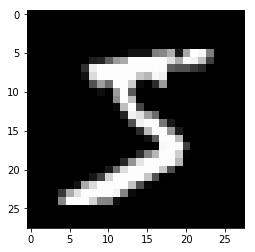

In [14]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

## Start with Torch

In [15]:
import torch

In [17]:
(x_train, y_train, x_valid, y_valid) = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [20]:
n, c = x_train.shape

In [21]:
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [23]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)

In [24]:
weights.requires_grad_()

tensor([[ 0.0441, -0.0079, -0.0361,  ...,  0.0252, -0.0017,  0.0179],
        [-0.0163, -0.0772,  0.0680,  ..., -0.0309, -0.0289,  0.0004],
        [ 0.0211,  0.0252, -0.0423,  ..., -0.0485,  0.0521, -0.0077],
        ...,
        [ 0.0105, -0.0759,  0.0074,  ...,  0.0138, -0.0313,  0.0296],
        [ 0.0202,  0.0561, -0.0228,  ..., -0.0072,  0.0103,  0.0480],
        [-0.0002,  0.0476,  0.0005,  ..., -0.1027,  0.0195,  0.0265]],
       requires_grad=True)

In [25]:
bias = torch.zeros(10, requires_grad=True)

In [31]:
def log_softmax(x):
    # x is (batch, classes) shape
    # x.exp().sum(-1).log() is (batch) shape, so need to unsqueeze for broadcasting
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [32]:
bs = 64

xb = x_train[0:bs]
preds = model(xb)

In [36]:
print(preds[0])
print(preds.shape)

tensor([-2.0784, -2.4136, -2.1865, -2.4199, -2.9380, -2.2734, -2.0478, -2.8368,
        -1.9763, -2.2830], grad_fn=<SelectBackward>)
torch.Size([64, 10])


In [41]:
def nll(input, target):
    ''' Negative log likelihood, note that log was already applied to input'''
    # input: (B, 10) - log softmax
    # target (B)
    # returns average negative log likelihood for the batch
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [48]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3397, grad_fn=<NegBackward>)


In [60]:
def accuracy(out, yb):
    # out: (B, 10)
    # yb: (B)
    preds = out.argmax(-1) # (B)
    return (preds == yb).float().mean()

In [61]:
accuracy(preds, yb)

tensor(0.0625)

In [76]:
lr = 0.5
epochs = 2

for epoch in range(epochs):
    # (n - 1) because starts at 0
    # + 1 because
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i: end_i]
        yb = y_train[start_i: end_i]
        
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        if (i % 10) == 0:
            print(loss)
        
        loss.backward()
        
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

tensor(2.3397, grad_fn=<NegBackward>)
tensor(0.9230, grad_fn=<NegBackward>)
tensor(0.6584, grad_fn=<NegBackward>)
tensor(0.4684, grad_fn=<NegBackward>)
tensor(0.4317, grad_fn=<NegBackward>)
tensor(0.4115, grad_fn=<NegBackward>)
tensor(0.3105, grad_fn=<NegBackward>)
tensor(0.3729, grad_fn=<NegBackward>)
tensor(0.7740, grad_fn=<NegBackward>)
tensor(0.2922, grad_fn=<NegBackward>)
tensor(0.3155, grad_fn=<NegBackward>)
tensor(0.2968, grad_fn=<NegBackward>)
tensor(0.3563, grad_fn=<NegBackward>)
tensor(0.2627, grad_fn=<NegBackward>)
tensor(0.3172, grad_fn=<NegBackward>)
tensor(0.2730, grad_fn=<NegBackward>)
tensor(0.3652, grad_fn=<NegBackward>)
tensor(0.2839, grad_fn=<NegBackward>)
tensor(0.6398, grad_fn=<NegBackward>)
tensor(0.4583, grad_fn=<NegBackward>)
tensor(0.2984, grad_fn=<NegBackward>)
tensor(0.2352, grad_fn=<NegBackward>)
tensor(0.4548, grad_fn=<NegBackward>)
tensor(0.5952, grad_fn=<NegBackward>)
tensor(0.2707, grad_fn=<NegBackward>)
tensor(0.5572, grad_fn=<NegBackward>)
tensor(0.454

In [77]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0809, grad_fn=<NegBackward>) tensor(1.)


## Use `torch.nn.functional`